# API AUTOMATION PRJECT



## API calling (Using CoinMarketCap API)

In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '6efe8da9-a7b6-44dc-8a15-0255068269d5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
#When we make the API call the input/output publishing (IOPub) data rate exceeds the allowed limit in Jupyter Notebook.
#This happens when there is a large amount of output being generated
#Jupyter Notebook is trying to prevent the notebook from crashing due to an overload of output data.
#jupyter notebook --NotebookApp.iopub_data_rate_limit=xxxxxx (Alternatively use this cmd in the Anaconda prompt)


{'status': {'timestamp': '2024-01-13T12:12:10.031Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9005}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10704, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

# Normalizing and saving in a data frame

In [274]:
import pandas as pd


#setting to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
global df
df = pd.json_normalize(data['data'])
#Adding a timeStamp
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19597625.00000,19597625.00000,False,NaN,1,NaN,NaN,None,2024-01-13T12:11:00.000Z,42652.97280,43527375316.75007,0.27900,-0.19431,-7.22457,-2.48184,-1.18810,17.65626,58.88953,835896966080.09497,49.83880,895712428811.25000,None,2024-01-13T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-14 11:55:45.266153
1,1027,Ethereum,ETH,ethereum,8236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120181204.34119,120181204.34119,True,NaN,2,NaN,NaN,None,2024-01-13T12:11:00.000Z,2545.13321,22843481801.24733,16.45280,0.27302,-4.53962,13.57899,10.43314,25.43950,63.67629,305877174428.90472,18.24040,305877174428.90002,None,2024-01-13T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-14 11:55:45.266153
2,825,Tether USDt,USDT,tether,71257,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95010835101.64194,98602960963.43437,True,NaN,3,NaN,NaN,None,2024-01-13T12:10:00.000Z,0.99976,69294787908.83481,-1.81280,-0.00515,-0.02436,-0.08607,-0.03141,-0.06996,-0.03641,94987930659.68036,5.66350,98579190560.89000,None,2024-01-13T12:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-14 11:55:45.266153
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689912.60673,151689912.60673,False,NaN,4,NaN,NaN,None,2024-01-13T12:10:00.000Z,299.52075,1084595890.69328,-13.04300,0.22026,-3.46244,-2.45240,18.88589,22.57853,44.63545,45434276285.86584,2.70940,45434276285.87000,None,2024-01-13T12:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-14 11:55:45.266153
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432548755.47497,567061308.32270,True,NaN,5,NaN,NaN,None,2024-01-13T12:11:00.000Z,92.44173,2763933179.49652,-18.77950,0.51505,-5.93772,-2.63655,26.09962,76.19281,322.92025,39985554720.29656,2.38450,52420127642.73000,None,2024-01-13T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-14 11:55:45.266153
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-13T12:11:00.000Z,0.57524,1455811730.45774,-17.53390,0.08932,-4.01578,1.41044,-9.08486,-11.63596,18.18350,31216202008.49860,1.86150,57523549618.28000,None,2024-01-13T12:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-14 11:55:45.266153
6,3408,USDC,USDC,usd-coin,16175,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25480267309.17421,25480267309.17421,False,NaN,7,NaN,NaN,None,2024-01-13T12:11:00.000Z,0.99996,9192109679.43587,0.89770,-0.02548,0.00302,0.00497,-0.03469,-0.01835,-0.01919,25479160404.56015,1.51940,25479160404.56000,None,2024-01-13T12:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-14 11:55:45.266153
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35387440718.84800,36528237975.52500,False,NaN,8,NaN,NaN,None,2024-01-13T12:10:00.000Z,0.54993,642452860.69859,-22.92520,0.07676,-5.50131,5.37723,-16.40488,54.17961,123.00251,19460779451.31321,1.16030,24747058773.39000,None,2024-01-13T12:10:

## Combining all in a function

In [275]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    
    # Replace append with concat
    df = pd.concat([df, df2], ignore_index=True)

# Initialize df globally
df = pd.DataFrame()


    #To create a csv and append data to it:
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')


In [276]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(1) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

## Reading the CSV File in case CSV was created

In [277]:
#df99 = pd.read_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv')
#df99

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.959762e+07,1.959762e+07,False,NaN,1,NaN,NaN,None,2024-01-13T12:13:00.000Z,42663.581575,4.350952e+10,0.2497,0.076978,-7.181621,-2.441679,-1.106181,17.524057,58.933719,8.361049e+11,49.8302,8.959352e+11,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
1,1027,Ethereum,ETH,ethereum,8236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201812e+08,1.201812e+08,True,NaN,2,NaN,NaN,None,2024-01-13T12:13:00.000Z,2544.050193,2.277396e+10,15.8418,0.424534,-4.735870,13.506970,10.444443,25.184147,63.608559,3.057470e+11,18.2129,3.057470e+11,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
2,825,Tether USDt,USDT,tether,71257,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.501084e+10,9.860296e+10,True,NaN,3,NaN,NaN,None,2024-01-13T12:12:00.000Z,0.999761,6.928402e+10,-1.8444,-0.015807,-0.025069,-0.088454,-0.052369,-0.055930,-0.034832,9.498815e+10,5.6611,9.857942e+10,None,2024-01-13T12:12:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-13 17:44:56.860832
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516899e+08,1.516899e+08,False,NaN,4,NaN,NaN,None,2024-01-13T12:12:00.000Z,299.473378,1.084300e+09,-13.0893,0.243012,-3.509709,-2.488936,18.868641,22.589541,44.617647,4.542709e+10,2.7060,4.542709e+10,None,2024-01-13T12:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.325488e+08,5.670613e+08,True,NaN,5,NaN,NaN,None,2024-01-13T12:13:00.000Z,92.372224,2.759550e+09,-18.8025,0.495588,-6.005206,-2.747978,26.182823,76.095017,322.857169,3.995549e+10,2.3801,5.238071e+10,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,False,NaN,6,NaN,NaN,None,2024-01-13T12:13:00.000Z,0.575206,1.453875e+09,-17.5653,0.164201,-3.983546,1.399463,-9.069544,-11.655210,18.195054,3.121460e+10,1.8594,5.752061e+10,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
6,3408,USDC,USDC,usd-coin,16175,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.548027e+10,2.548027e+10,False,NaN,7,NaN,NaN,None,2024-01-13T12:13:00.000Z,1.000085,9.189568e+09,0.9037,-0.003058,0.013597,0.000609,-0.008491,-0.001369,-0.009375,2.548243e+10,1.5180,2.548243e+10,None,2024-01-13T12:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-13 17:44:56.860832
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.538777e+10,3.652824e+10,False,NaN,8,NaN,NaN,None,2024-01-13T12:12:00.000Z,0.549837,6.425310e+08,-22.7926,0.088813,-5.565018,5.355185,-16.335051,54.207035,122.957310,1.945749e+10,1.1596,2.474264e+10,None,2024-01-13T12:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-

In [278]:
#Formatting data numbers from scientific notation to decimal points

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [15]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,10704,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19597625.00000,19597625.00000,False,NaN,1,NaN,NaN,None,2024-01-13T12:13:00.000Z,42663.58158,43509524122.58826,0.24970,0.07698,-7.18162,-2.44168,-1.10618,17.52406,58.93372,836104872870.91492,49.83020,895935213082.67004,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
1,1027,Ethereum,ETH,ethereum,8236,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120181204.34119,120181204.34119,True,NaN,2,NaN,NaN,None,2024-01-13T12:13:00.000Z,2544.05019,22773962633.23111,15.84180,0.42453,-4.73587,13.50697,10.44444,25.18415,63.60856,305747016101.02960,18.21290,305747016101.03003,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
2,825,Tether USDt,USDT,tether,71257,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95010835101.64194,98602960963.43437,True,NaN,3,NaN,NaN,None,2024-01-13T12:12:00.000Z,0.99976,69284018754.66006,-1.84440,-0.01581,-0.02507,-0.08845,-0.05237,-0.05593,-0.03483,94988149575.88512,5.66110,98579417753.78000,None,2024-01-13T12:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-13 17:44:56.860832
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689899.23011,151689899.23011,False,NaN,4,NaN,NaN,None,2024-01-13T12:12:00.000Z,299.47338,1084300333.02270,-13.08930,0.24301,-3.50971,-2.48894,18.86864,22.58954,44.61765,45427086506.97125,2.70600,45427086506.97000,None,2024-01-13T12:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432548755.47497,567061308.32270,True,NaN,5,NaN,NaN,None,2024-01-13T12:13:00.000Z,92.37222,2759549672.31717,-18.80250,0.49559,-6.00521,-2.74798,26.18282,76.09502,322.85717,39955490357.35694,2.38010,52380713965.62000,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
5,52,XRP,XRP,xrp,1198,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,None,2024-01-13T12:13:00.000Z,0.57521,1453875126.49037,-17.56530,0.16420,-3.98355,1.39946,-9.06954,-11.65521,18.19505,31214604282.90046,1.85940,57520605414.89000,None,2024-01-13T12:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-13 17:44:56.860832
6,3408,USDC,USDC,usd-coin,16175,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25480267309.17421,25480267309.17421,False,NaN,7,NaN,NaN,None,2024-01-13T12:13:00.000Z,1.00009,9189568238.96736,0.90370,-0.00306,0.01360,0.00061,-0.00849,-0.00137,-0.00938,25482434841.42153,1.51800,25482434841.42000,None,2024-01-13T12:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-13 17:44:56.860832
7,2010,Cardano,ADA,cardano,1023,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35387774596.45300,36528237975.52500,False,NaN,8,NaN,NaN,None,2024-01-13T12:12:00.000Z,0.54984,642530982.20329,-22.79260,0.08881,-5.56502,5.35518,-16.33505,54.20703,122.95731,19457490169.61968,1.15960,24742642554.32000,None,2024-01-13T12:12:0

## Grouping the data to visualize a trend

In [16]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07698,-7.18162,-2.44168,-1.10618,17.52406,58.93372
Ethereum,0.42453,-4.73587,13.50697,10.44444,25.18415,63.60856
Tether USDt,-0.01581,-0.02507,-0.08845,-0.05237,-0.05593,-0.03483
BNB,0.24301,-3.50971,-2.48894,18.86864,22.58954,44.61765
Solana,0.49559,-6.00521,-2.74798,26.18282,76.09502,322.85717
XRP,0.16420,-3.98355,1.39946,-9.06954,-11.65521,18.19505
USDC,-0.00306,0.01360,0.00061,-0.00849,-0.00137,-0.00938
Cardano,0.08881,-5.56502,5.35518,-16.33505,54.20703,122.95731
Avalanche,0.47423,-6.53493,3.38323,-8.06350,115.28813,295.48050


## Transformig the data to make Visualize

In [17]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.07698
             quote.USD.percent_change_24h    -7.18162
             quote.USD.percent_change_7d     -2.44168
             quote.USD.percent_change_30d    -1.10618
             quote.USD.percent_change_60d    17.52406
             quote.USD.percent_change_90d    58.93372
Ethereum     quote.USD.percent_change_1h      0.42453
             quote.USD.percent_change_24h    -4.73587
             quote.USD.percent_change_7d     13.50697
             quote.USD.percent_change_30d    10.44444
             quote.USD.percent_change_60d    25.18415
             quote.USD.percent_change_90d    63.60856
Tether USDt  quote.USD.percent_change_1h     -0.01581
             quote.USD.percent_change_24h    -0.02507
             quote.USD.percent_change_7d     -0.08845
             quote.USD.percent_change_30d    -0.05237
             quote.USD.percent_change_60d    -0.05593
             quote.USD.percent_change_90

In [130]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.07698
            quote.USD.percent_change_24h  -7.18162
            quote.USD.percent_change_7d   -2.44168
            quote.USD.percent_change_30d  -1.10618
            quote.USD.percent_change_60d  17.52406
            quote.USD.percent_change_90d  58.93372
Ethereum    quote.USD.percent_change_1h    0.42453
            quote.USD.percent_change_24h  -4.73587
            quote.USD.percent_change_7d   13.50697
            quote.USD.percent_change_30d  10.44444
            quote.USD.percent_change_60d  25.18415
            quote.USD.percent_change_90d  63.60856
Tether USDt quote.USD.percent_change_1h   -0.01581
            quote.USD.percent_change_24h  -0.02507
            quote.USD.percent_change_7d   -0.08845
            quote.USD.percent_change_30d  -0.05237
            quote.USD.percent_change_60d  -0.05593
            quote.USD.percent_change_90d  -0.03483
BNB         quote.USD.percent_change_1h    0.24301
            quote.USD.percent_change_24h  -3.50971
            quote.USD.percent_change_7d   -2.48894
            quote.USD.percent_change_30d  18.86864
            quote.USD.percent_change_60d  22.58954
            quote.USD.percent_change_90d  44.61765
Solana      quote.USD.percent_change_1h    0.49559
            quote.USD.percent_change_24h  -6.00521
            quote.USD.percent_change_7d   -2.74798
            quote.USD.percent_change_30d  26.18282
            quote.USD.percent_change_60d  76.09502
            quote.USD.percent_change_90d 322.85717
XRP         quote.USD.percent_change_1h    0.16420
            quote.USD.percent_change_24h  -3.98355
            quote.USD.percent_change_7d    1.39946
            quote.USD.percent_change_30d  -9.06954
            quote.USD.percent_change_60d -11.65521
            quote.USD.percent_change_90d  18.19505
USDC        quote.USD.percent_change_1h   -0.00306
            quote.USD.percent_change_24h   0.01360
            quote.USD.percent_change_7d    0.00061
            quote.USD.percent_change_30d  -0.00849
            quote.USD.percent_change_60d  -0.00137
            quote.USD.percent_change_90d  -0.00938
Cardano     quote.USD.percent_change_1h    0.08881
            quote.USD.percent_change_24h  -5.56502
            quote.USD.percent_change_7d    5.35518
            quote.USD.percent_change_30d -16.33505
            quote.USD.percent_change_60d  54.20703
            quote.USD.percent_change_90d 122.95731
Avalanche   quote.USD.percent_change_1h    0.47423
            quote.USD.percent_change_24h  -6.53493
            quote.USD.percent_change_7d    3.38323
            quote.USD.percent_change_30d  -8.06350
            quote.USD.percent_change_60d 115.28813
            quote.USD.percent_change_90d 295.48050
Dogecoin    quote.USD.percent_change_1h    0.60615
            quote.USD.percent_change_24h  -5.20483
            quote.USD.percent_change_7d   -0.63431
            quote.USD.percent_change_30d -17.57032
            quote.USD.percent_change_60d   9.50516
            quote.USD.percent_change_90d  35.69139
TRON        quote.USD.percent_change_1h    1.12568
            quote.USD.percent_change_24h   5.83471
            quote.USD.percent_change_7d    9.64037
            quote.USD.percent_change_30d   7.97227
            quote.USD.percent_change_60d   8.10294
            quote.USD.percent_change_90d  33.17398
Polkadot    quote.USD.percent_change_1h    0.39752
            quote.USD.percent_change_24h  -5.08340
            quote.USD.percent_change_7d    6.26798
            quote.USD.percent_change_30d   2.26018
            quote.USD.percent_change_60d  44.76251
            quote.USD.percent_change_90d 105.01458
Polygon     quote.USD.percent_change_1h    0.48491
            quote.USD.percent_change_24h  -6.32181
            quote.USD.percent_change_7d    6.07054
            quote.USD.percent_change_30d  -2.67806
            quote.USD.percent_change_60d  -5.81463
            quo

In [131]:
df5.count()

values    90
dtype: int64

In [233]:
#Creating an index

index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function

df6 = df5.set_index(index)
df6 =df5.reset_index()
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

#Error catch:
# If it only has the index and values try doing reset_index like "df5.reset_index()"


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.07698
1,Bitcoin,quote.USD.percent_change_24h,-7.18162
2,Bitcoin,quote.USD.percent_change_7d,-2.44168
3,Bitcoin,quote.USD.percent_change_30d,-1.10618
4,Bitcoin,quote.USD.percent_change_60d,17.52406
5,Bitcoin,quote.USD.percent_change_90d,58.93372
6,Ethereum,quote.USD.percent_change_1h,0.42453
7,Ethereum,quote.USD.percent_change_24h,-4.73587
8,Ethereum,quote.USD.percent_change_7d,13.50697
9,Ethereum,quote.USD.percent_change_30d,10.44444


In [279]:
#Formatting "percent_change" so as to make visualizatons clean

df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.07698
1,Bitcoin,24h,-7.18162
2,Bitcoin,7d,-2.44168
3,Bitcoin,30d,-1.10618
4,Bitcoin,60d,17.52406
5,Bitcoin,90d,58.93372
6,Ethereum,1h,0.42453
7,Ethereum,24h,-4.73587
8,Ethereum,7d,13.50697
9,Ethereum,30d,10.44444


## Visualizations:

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


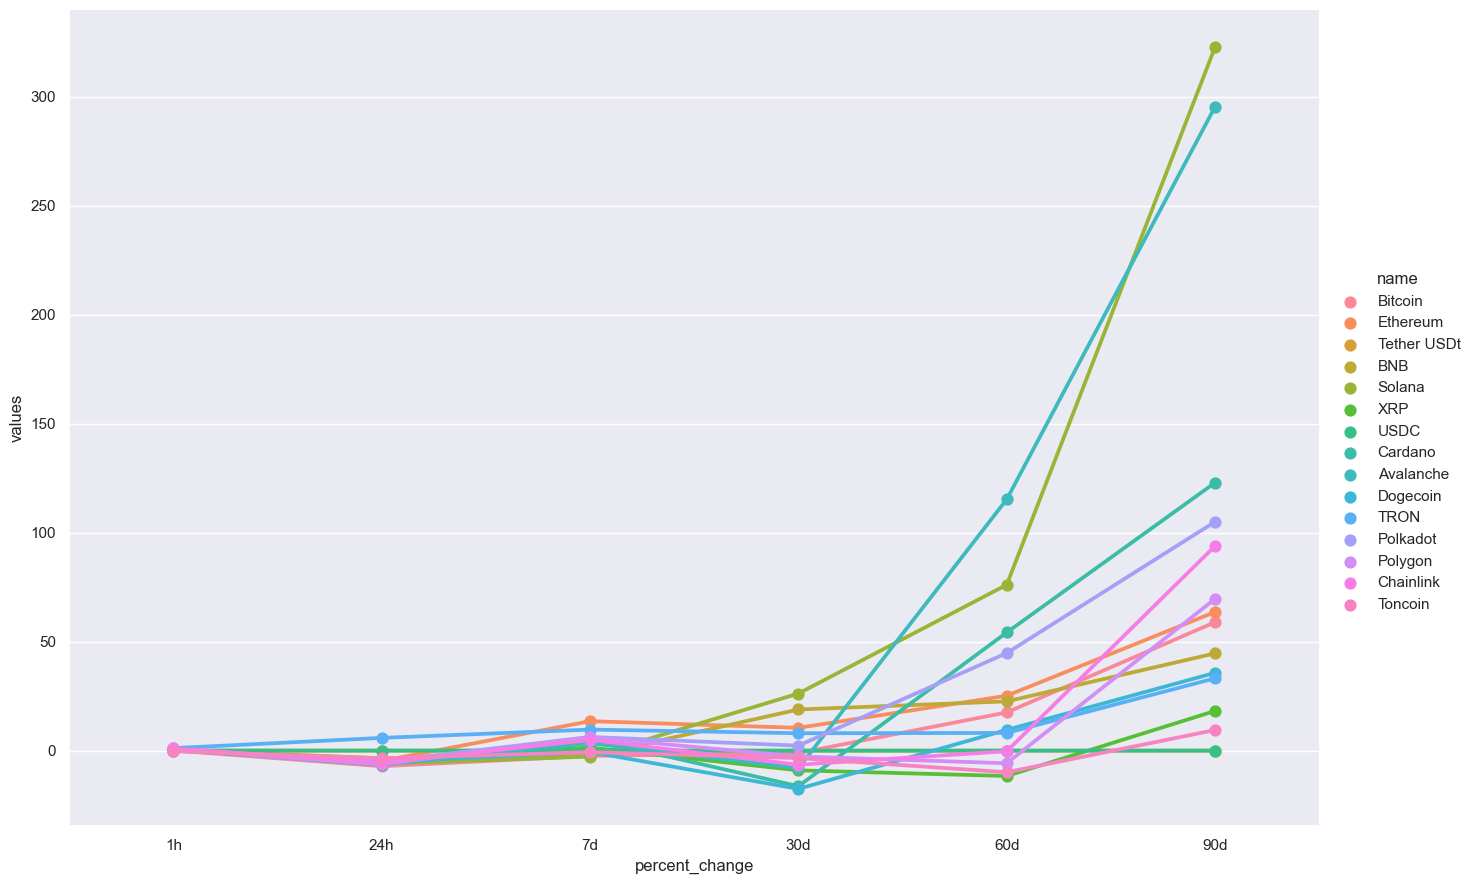

In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point', height=9, aspect=1.5)

In [285]:
#Making standalone visualization for Bitcoin

df11 = df7.query("name == 'Bitcoin'")
df11


,name,percent_change,values
0,Bitcoin,1h,0.07698
1,Bitcoin,24h,-7.18162
2,Bitcoin,7d,-2.44168
3,Bitcoin,30d,-1.10618
4,Bitcoin,60d,17.52406
5,Bitcoin,90d,58.93372


<Axes: xlabel='percent_change', ylabel='values'>

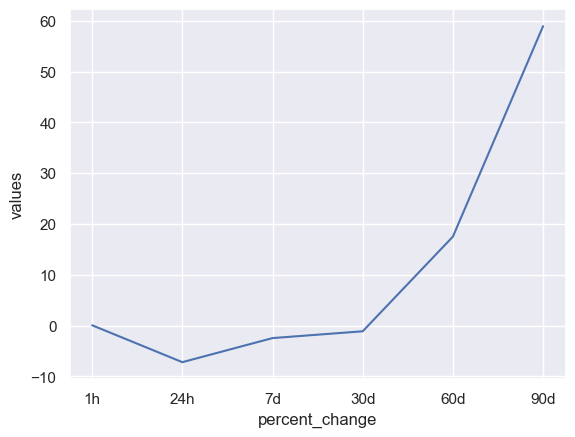

In [286]:
sns.lineplot(x='percent_change', y='values', data = df11)

## Making Visualizations with the data we've captured using Automation:

In [269]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,42663.58158,2024-01-13 17:44:56.860832
15,Bitcoin,42663.58158,2024-01-13 17:44:58.416121
30,Bitcoin,42663.58158,2024-01-13 17:45:00.060467
45,Bitcoin,42663.58158,2024-01-13 17:45:01.682142
60,Bitcoin,42663.58158,2024-01-13 17:45:03.278183
75,Bitcoin,42663.58158,2024-01-13 17:45:04.952273
90,Bitcoin,42663.58158,2024-01-13 17:45:06.557223
105,Bitcoin,42663.58158,2024-01-13 17:45:08.131533
120,Bitcoin,42663.58158,2024-01-13 17:45:09.746751


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

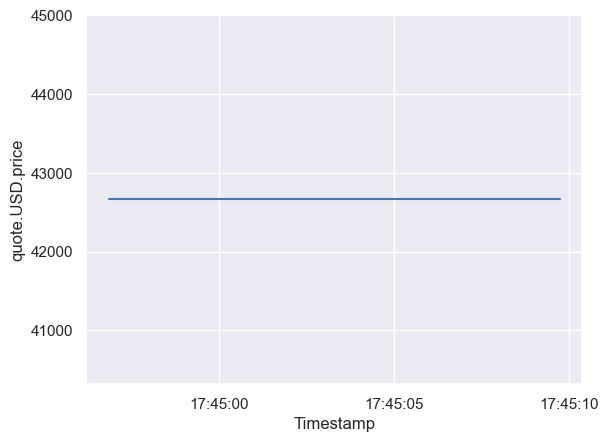

In [271]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)